In [4]:
from matplotlib import pyplot as plt
import glob
import numpy as np

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

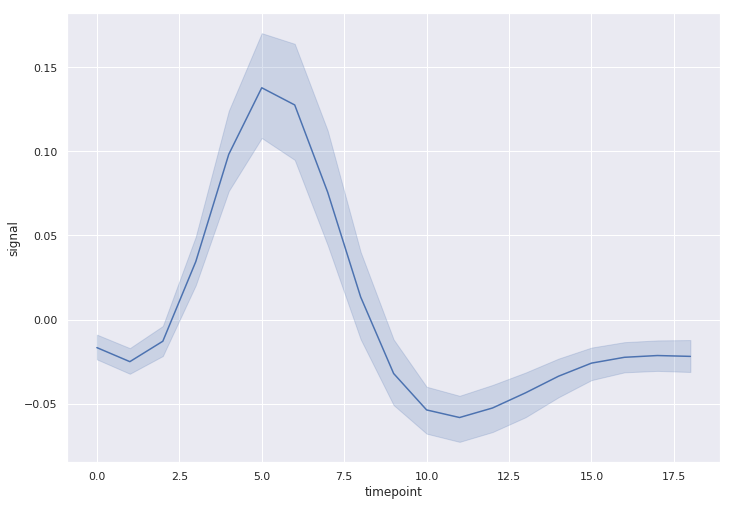

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)


In [7]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


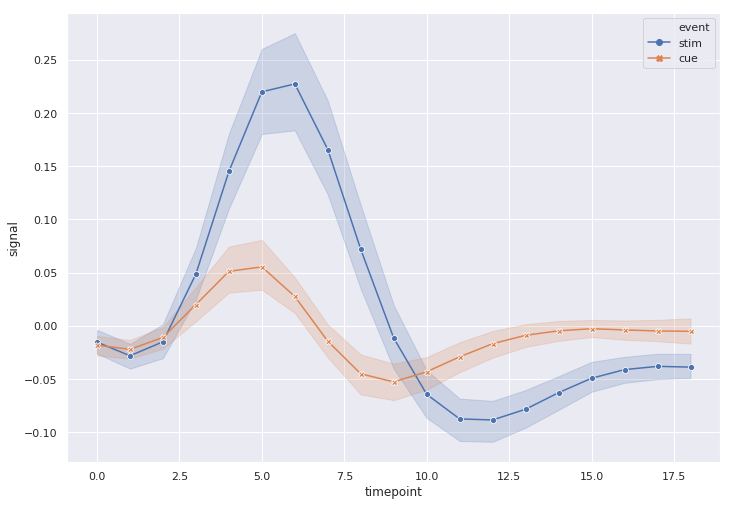

In [8]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="event", style="event",
                  markers=True, dashes=False, data=fmri)

In [9]:
def stat(path):
    acc = []
    tacc = []
    for f in glob.glob(path+'*'):
        with open(f) as ff:
            _, train_acc, test_acc = map(float, ff.readline().split(' '))
            acc.append(test_acc)
            tacc.append(train_acc)
    return acc, tacc

In [10]:
a, b = stat("../results/IMDBBINARY/IMDBBINARY_{}".format(0.05))

In [11]:
def df_backward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
    df = pd.DataFrame(df)
    return df

In [12]:
def df_backward_forward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_forward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'forward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'forward_train'})
    df = pd.DataFrame(df)
    return df

In [13]:
def df_backward_exact(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/exact_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'exact_backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'exact_backward_train'})
    df = pd.DataFrame(df)
    return df

In [14]:
IMDBBINARY_est = df_backward_est("IMDBBINARY")

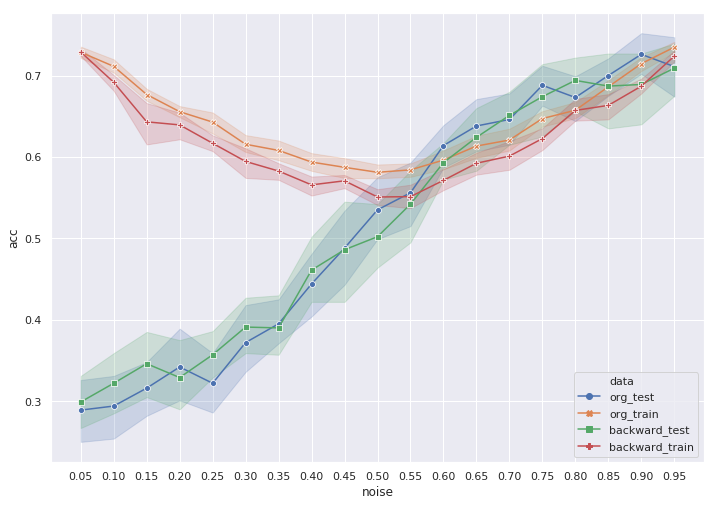

In [15]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBBINARY_est)

In [16]:
IMDBMULTI_est = df_backward_est("IMDBMULTI")

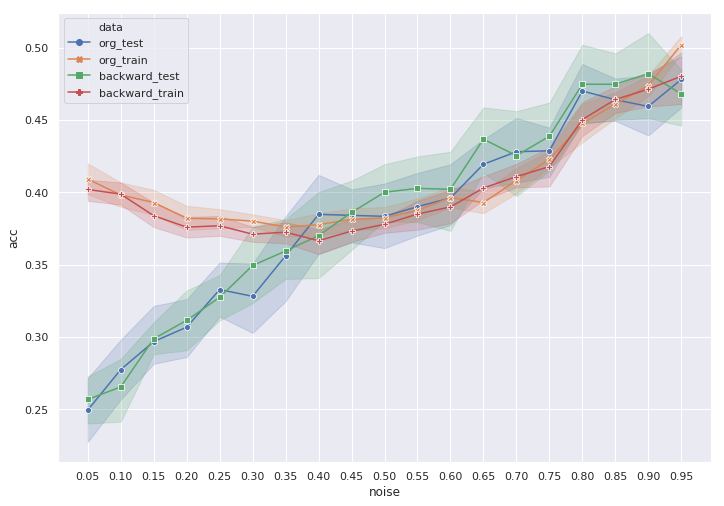

In [17]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBMULTI_est)

In [18]:
PROTEINS_est = df_backward_forward_est("PROTEINS")

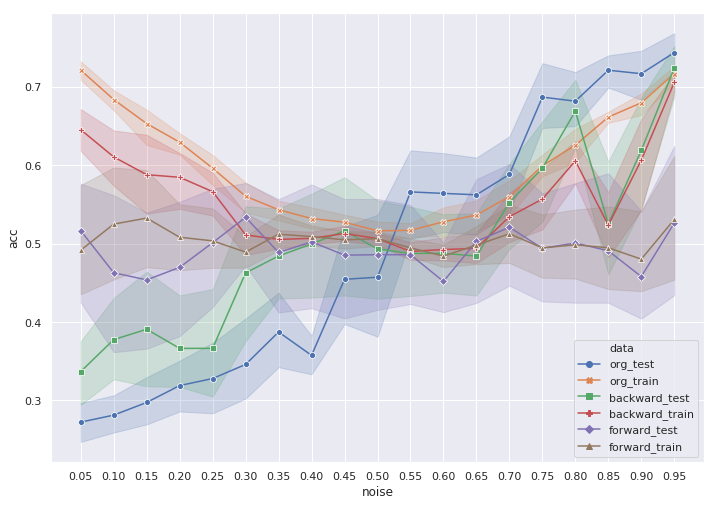

In [19]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PROTEINS_est)

In [20]:
MUTAG_exact = df_backward_exact("MUTAG")

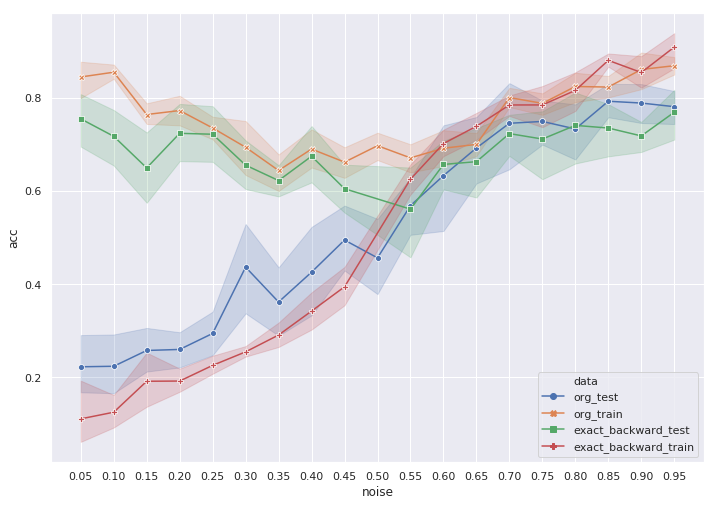

In [21]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=MUTAG_exact)

In [22]:
NCI1_est = df_backward_forward_est("NCI1")

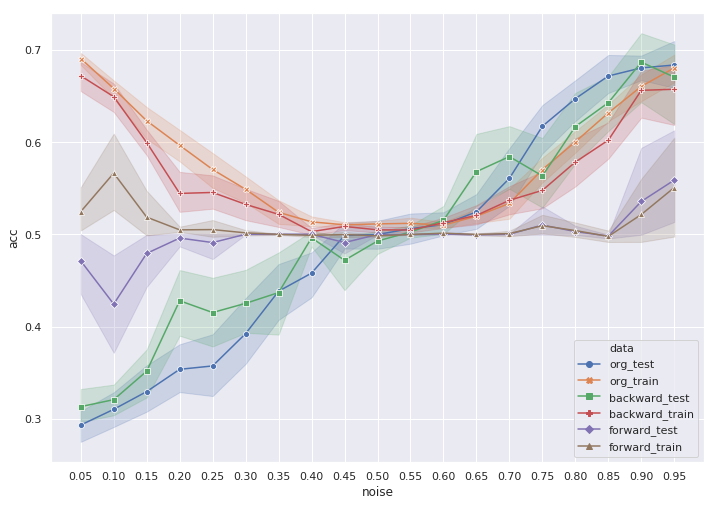

In [23]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=NCI1_est)

In [24]:
PTC_est = df_backward_forward_est("PTC")

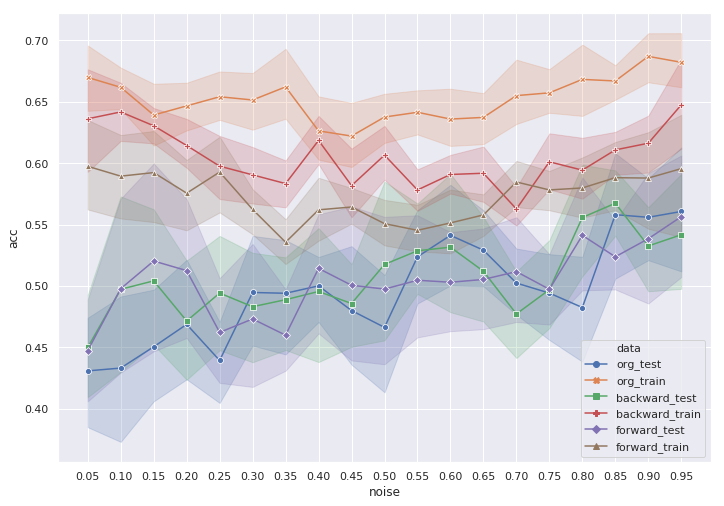

In [25]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PTC_est)

In [26]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/COLLAB/COLLAB_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

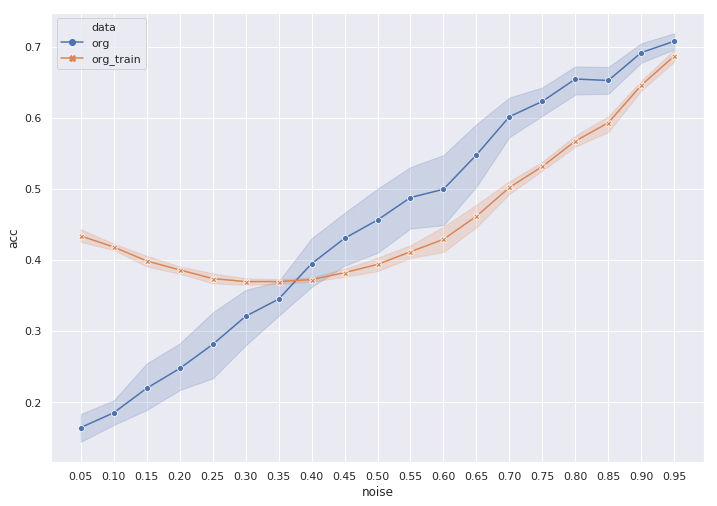

In [27]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

In [28]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/IMDBMULTI/IMDBMULTI_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

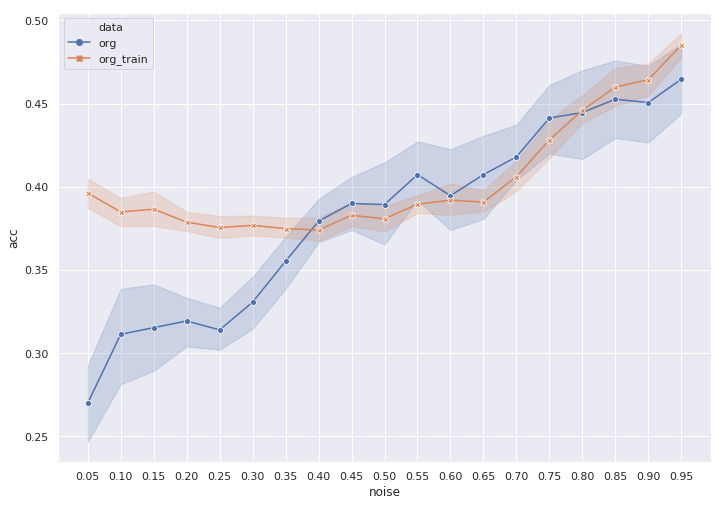

In [29]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

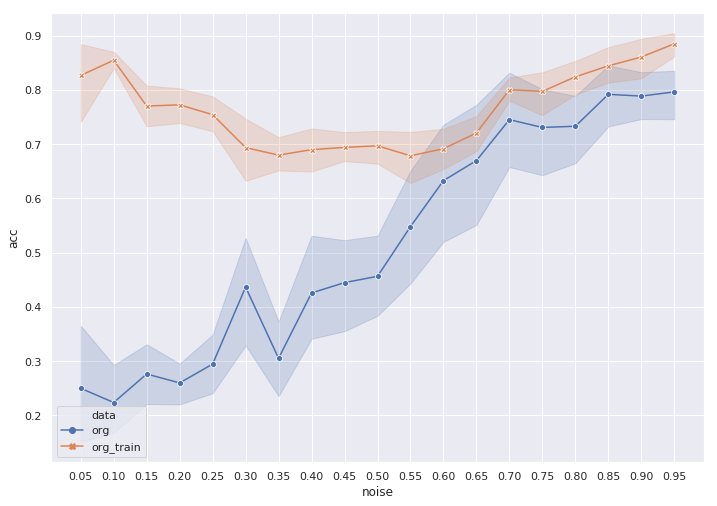

In [30]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/MUTAG/MUTAG_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

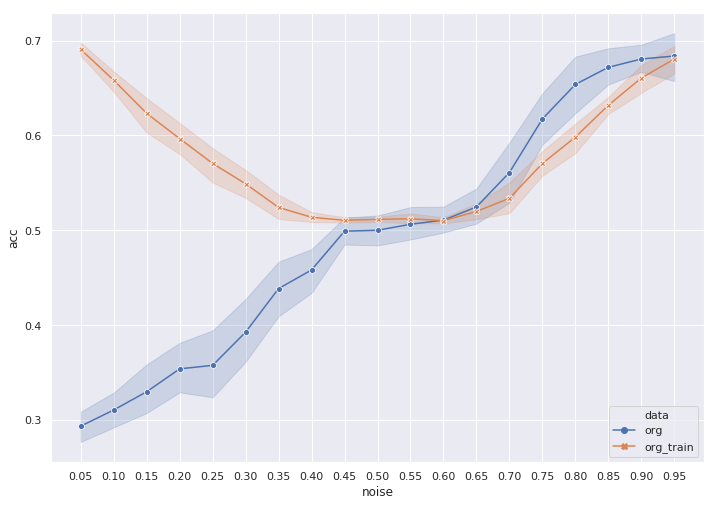

In [31]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/NCI1/NCI1_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

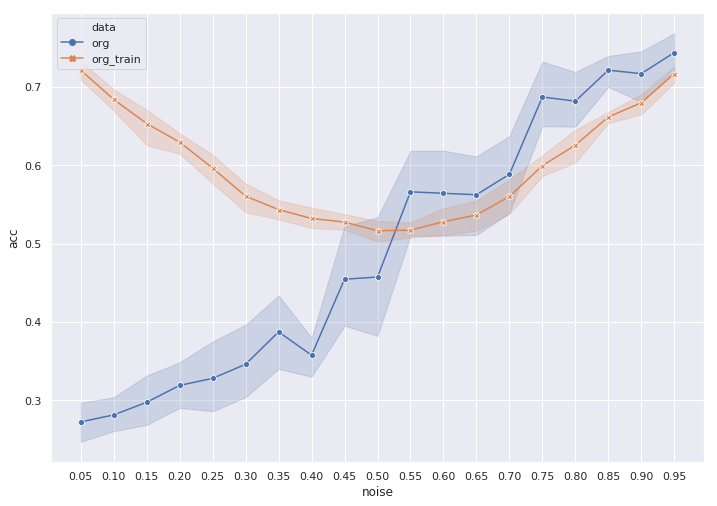

In [32]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PROTEINS/PROTEINS_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

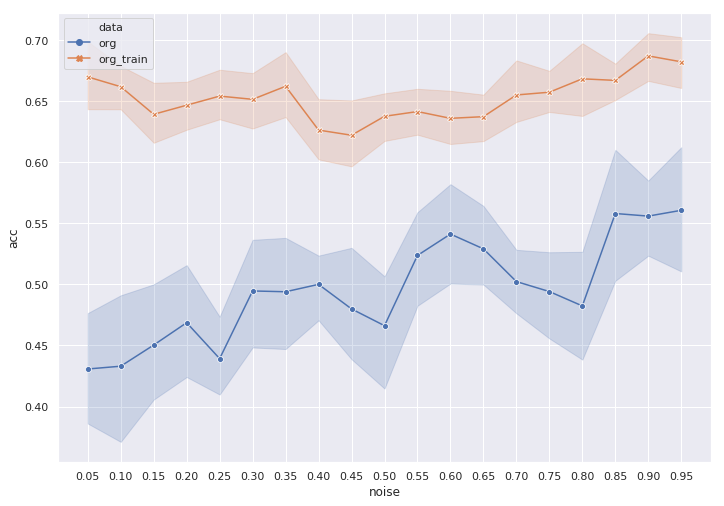

In [33]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PTC/PTC_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

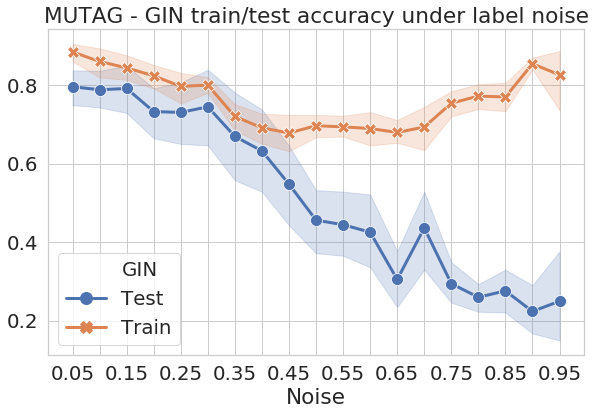

In [53]:
sns.set(rc={'figure.figsize':(3.2*3,2*3), 
            'lines.linewidth': 3, 
            'lines.markersize': 12}, font='Roboto', font_scale=1.8)
sns.set_style("whitegrid")

COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/MUTAG/MUTAG_self_{}".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'GIN': 'Test'})
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': tacc, 'GIN': 'Train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="Noise", y="Accuracy",
                  hue="GIN", style="GIN",
                  markers=True, dashes=False, 
                  data=COLLAB_est, legend="full")
ax.set_ylabel('')
for j, i in enumerate(ax.xaxis.get_ticklabels()):
    if j % 2 == 1:
        i.set_visible(False)
    else:
        i.set_text('la')
plt.title('MUTAG - GIN train/test accuracy under label noise')
ax.legend(loc='lower left')
fig = ax.get_figure()
fig.savefig("MUTAG_noisy_training.pdf", 
            dpi=400, 
            bbox_inches='tight',
            transparent=True)

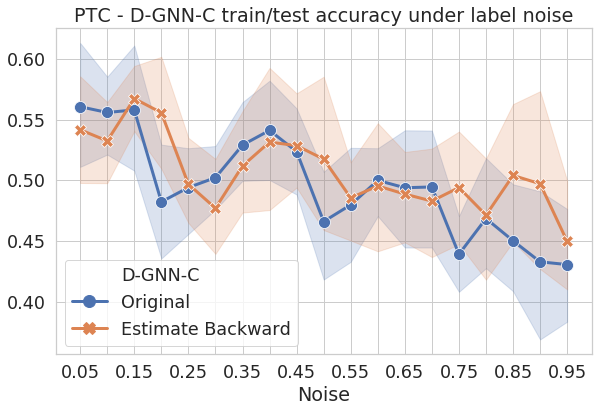

In [91]:
sns.set(rc={'figure.figsize':(3.2*3,2*3), 
            'lines.linewidth': 3, 
            'lines.markersize': 12}, font='Roboto', font_scale=1.6)
sns.set_style("whitegrid")

COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PTC/PTC_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Original'})
    for acc, tacc in zip(*stat("../results/PTC/estimate_backward_PTC_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Estimate Backward'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="Noise", y="Accuracy",
                  hue="D-GNN-C", style="D-GNN-C",
                  markers=True, dashes=False, 
                  data=COLLAB_est, legend="full")
ax.set_ylabel('')
for j, i in enumerate(ax.xaxis.get_ticklabels()):
    if j % 2 == 1:
        i.set_visible(False)
    else:
        i.set_text('la')
plt.title('PTC - D-GNN-C train/test accuracy under label noise')
ax.legend(loc='lower left')
fig = ax.get_figure()
fig.savefig("PTC_est_backward.pdf", 
            dpi=400, 
            bbox_inches='tight',
            transparent=True)

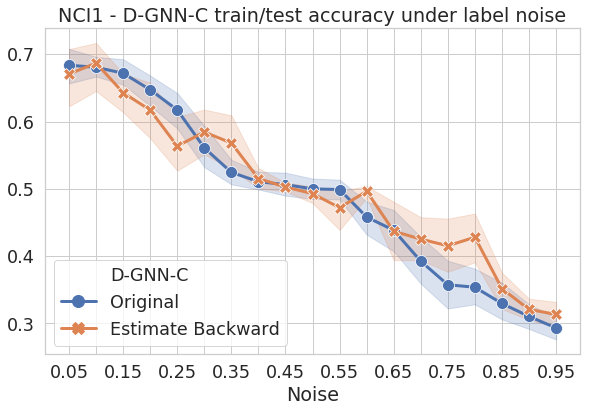

In [92]:
sns.set(rc={'figure.figsize':(3.2*3,2*3), 
            'lines.linewidth': 3, 
            'lines.markersize': 12}, font='Roboto', font_scale=1.6)
sns.set_style("whitegrid")

COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/NCI1/NCI1_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Original'})
    for acc, tacc in zip(*stat("../results/NCI1/estimate_backward_NCI1_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Estimate Backward'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="Noise", y="Accuracy",
                  hue="D-GNN-C", style="D-GNN-C",
                  markers=True, dashes=False, 
                  data=COLLAB_est, legend="full")
ax.set_ylabel('')
for j, i in enumerate(ax.xaxis.get_ticklabels()):
    if j % 2 == 1:
        i.set_visible(False)
    else:
        i.set_text('la')
plt.title('NCI1 - D-GNN-C train/test accuracy under label noise')
ax.legend(loc='lower left')
fig = ax.get_figure()
fig.savefig("NCI1_est_backward.pdf", 
            dpi=400, 
            bbox_inches='tight',
            transparent=True)

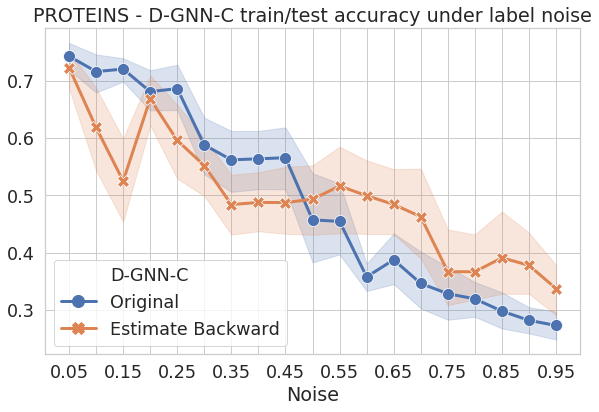

In [94]:
sns.set(rc={'figure.figsize':(3.2*3,2*3), 
            'lines.linewidth': 3, 
            'lines.markersize': 12}, font='Roboto', font_scale=1.6)
sns.set_style("whitegrid")

COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PROTEINS/PROTEINS_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Original'})
    for acc, tacc in zip(*stat("../results/PROTEINS/estimate_backward_PROTEINS_{}_fold_".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'D-GNN-C': 'Estimate Backward'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="Noise", y="Accuracy",
                  hue="D-GNN-C", style="D-GNN-C",
                  markers=True, dashes=False, 
                  data=COLLAB_est, legend="full")
ax.set_ylabel('')
for j, i in enumerate(ax.xaxis.get_ticklabels()):
    if j % 2 == 1:
        i.set_visible(False)
    else:
        i.set_text('la')
plt.title('PROTEINS - D-GNN-C train/test accuracy under label noise')
ax.legend(loc='lower left')
fig = ax.get_figure()
fig.savefig("PROTEINS_est_backward.pdf", 
            dpi=400, 
            bbox_inches='tight',
            transparent=True)

In [55]:
stat("../results/MUTAG/estimate_backward_MUTAG_0.05")

([0.388889,
  0.2,
  0.277778,
  0.111111,
  0.1,
  0.111111,
  0.25,
  0.210526,
  0.052632,
  0.111111],
 [0.835294,
  0.880952,
  0.794118,
  0.9,
  0.892857,
  0.858824,
  0.928571,
  0.91716,
  0.923077,
  0.817647])

In [58]:
def report(path):
    test, train = stat(path)
    print(path)
    print("Train: {} +- {}".format(np.mean(train), np.std(train)))
    print("Test: {} +- {}".format(np.mean(test), np.std(test)))

report("../results/MUTAG/MUTAG_self_0.80")

../results/MUTAG/MUTAG_self_0.80
Train: 0.823954 +- 0.049892044480057164
Test: 0.7328655 +- 0.10031737502571525


In [59]:
report("../results/MUTAG/estimate_backward_MUTAG_0.80_fold_")

../results/MUTAG/estimate_backward_MUTAG_0.80_fold_
Train: 0.6662764999999999 +- 0.14062853867280994
Test: 0.57269 +- 0.1578739994939002


In [60]:
report("../results/MUTAG/estimate_forward_MUTAG_0.80_fold_")

../results/MUTAG/estimate_forward_MUTAG_0.80_fold_
Train: 0.7595265000000001 +- 0.0977643998593046
Test: 0.6943861 +- 0.13746212770028696


In [61]:
report("../results/IMDBBINARY/IMDBBINARY_0.80_fold_")

../results/IMDBBINARY/IMDBBINARY_0.80_fold_
Train: 0.6573333 +- 0.015317153946148104
Test: 0.6729999999999999 +- 0.04473253849269008


In [62]:
report("../results/COLLAB/COLLAB_self_0.8_result_fold_")

../results/COLLAB/COLLAB_self_0.8_result_fold_
Train: 0.5671326 +- 0.013015032686858686
Test: 0.6544012 +- 0.03410256650986844


In [63]:
report("../results/NCI1/estimate_backward_NCI1_0.80_fold_")

../results/NCI1/estimate_backward_NCI1_0.80_fold_
Train: 0.5785083 +- 0.04184566729794136
Test: 0.617019 +- 0.06587352441003898


In [64]:
report("../results/NCI1/NCI1_0.80_fold_")

../results/NCI1/NCI1_0.80_fold_
Train: 0.6004059 +- 0.01915234973808698
Test: 0.6471823999999999 +- 0.034603989285052095


In [65]:
report("../results/IMDBMULTI/IMDBMULTI_0.80_fold_")

../results/IMDBMULTI/IMDBMULTI_0.80_fold_
Train: 0.4475555 +- 0.02072175678966434
Test: 0.4699999 +- 0.03363189293349396


In [66]:
report("../results/IMDBMULTI/estimate_backward_IMDBMULTI_0.80_fold")

../results/IMDBMULTI/estimate_backward_IMDBMULTI_0.80_fold
Train: 0.45022229999999996 +- 0.0193070413271946
Test: 0.47466659999999994 +- 0.043594242230367994


In [67]:
report("../results/IMDBBINARY/estimate_backward_IMDBBINARY_0.80_fold_")

../results/IMDBBINARY/estimate_backward_IMDBBINARY_0.80_fold_
Train: 0.6571111000000001 +- 0.020651141960918294
Test: 0.6940000000000001 +- 0.05517245689653487


In [68]:
report("../results/IMDBBINARY/IMDBBINARY_0.80_fold_")

../results/IMDBBINARY/IMDBBINARY_0.80_fold_
Train: 0.6573333 +- 0.015317153946148104
Test: 0.6729999999999999 +- 0.04473253849269008


In [69]:
report("../results/REDDITMULTI5K/REDDITMULTI5K_0.15_fold_")

../results/REDDITMULTI5K/REDDITMULTI5K_0.15_fold_
Train: 0.2505555 +- 0.030718576867263883
Test: 0.17 +- 0.040644802865803145


In [70]:
report("../results/REDDITBINARY/REDDITBINARY_0.80_fold_")

../results/REDDITBINARY/REDDITBINARY_0.80_fold_
Train: 0.6608335000000001 +- 0.037406755596416
Test: 0.6695 +- 0.03165833223655345


In [71]:
report("../results/REDDITBINARY/estimate_backward_REDDITBINARY_0.80_fold")

../results/REDDITBINARY/estimate_backward_REDDITBINARY_0.80_fold
Train: 0.49872239999999995 +- 0.009702349088751653
Test: 0.5005 +- 0.016800297616411445


In [72]:
report("../results/PROTEINS/PROTEINS_0.80_fold_")

../results/PROTEINS/PROTEINS_0.80_fold_
Train: 0.6257352 +- 0.033351336302463196
Test: 0.6819179 +- 0.055558940737652655


In [73]:
report("../results/PROTEINS/estimate_backward_PROTEINS_0.80_fold_")

../results/PROTEINS/estimate_backward_PROTEINS_0.80_fold_
Train: 0.6056784000000001 +- 0.04227598270223887
Test: 0.6692569999999999 +- 0.0685091738674464


In [74]:
report("../results/PTC/PTC_0.80_fold_")

../results/PTC/PTC_0.80_fold_
Train: 0.6682718999999999 +- 0.048102614547340355
Test: 0.4823529000000001 +- 0.07451349379736531


In [75]:
report("../results/PTC/estimate_forward_PTC_0.80_fol")

../results/PTC/estimate_forward_PTC_0.80_fol
Train: 0.5797885999999999 +- 0.041256632499999314
Test: 0.5411764 +- 0.07413622540458881
